<a href="https://colab.research.google.com/github/LeticiaGDornelas/Projetos_DNC/blob/main/Desafio6_LeticiaGDornelas_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio 6: Preveja os usuários com alta chance de deixar seu Streaming**

Contexto: Uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Objetivo: Criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
#Descrição estatística dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
#Verificação dos tipos de dados
print(df.dtypes)

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object


In [ ]:
#Verificação da quantidade de dados nulos
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [ ]:
#Substituição dos valores NaN por 0
df.fillna({
    'Time_on_platform': 0,
    'Num_streaming_services': 0,
    'Churned': 0,
    'Avg_rating': 0,
    'Devices_connected': 0
}, inplace=True)

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,0.0,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
#Eliminação de linhas nulas
df_limpo = df.dropna(subset=['Age', 'Gender', 'Subscription_type'])

In [ ]:
#Transformação de valores 0 e 1 por No e Yes
df_limpo['Churned'] = df_limpo['Churned'].replace({0: 'No', 1: 'Yes'})

<ipython-input-9-09d9fa02d7ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Churned'] = df_limpo['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


In [ ]:
#Transformação das colunas float para int
columns_to_exclude = ['Gender', 'Subscription_type', 'Churned', 'User_id']
df_limpo[df_limpo.columns.difference(columns_to_exclude)] = df_limpo[df_limpo.columns.difference(columns_to_exclude)].astype(int)

<ipython-input-12-c7bd2f213c17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo[df_limpo.columns.difference(columns_to_exclude)] = df_limpo[df_limpo.columns.difference(columns_to_exclude)].astype(int)


In [ ]:
df_limpo.dtypes

,0
Age,int64
Gender,object
Time_on_platform,int64
Devices_connected,int64
Subscription_type,object
Num_streaming_services,int64
Num_active_profiles,int64
Avg_rating,int64
Churned,object
User_id,object


## **Modelagem de dados - Regressão Logística**

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Transformar variáveis categóricas em variáveis numéricas usando LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder às variáveis categóricas
df_limpo['Gender'] = label_encoder.fit_transform(df_limpo['Gender'])
df_limpo['Subscription_type'] = label_encoder.fit_transform(df_limpo['Subscription_type'])
df_limpo['User_id'] = label_encoder.fit_transform(df_limpo['User_id'])

<ipython-input-15-886ff5e64a54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Gender'] = label_encoder.fit_transform(df_limpo['Gender'])
<ipython-input-15-886ff5e64a54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Subscription_type'] = label_encoder.fit_transform(df_limpo['Subscription_type'])
<ipython-input-15-886ff5e64a54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
# Definir as variáveis X e y
X = df_limpo.drop(columns=['Churned'])  # Variáveis independentes (features)
y = df_limpo['Churned']  # Variável dependente (target)

In [ ]:
# Realizar o .fit do modelo
# Escalonar as variáveis independentes
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Ajustar o modelo aos dados
model.fit(X_scaled, y)

LogisticRegression()

In [ ]:
# Separar os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinar o modelo nos dados de treino
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Realizar a modelagem
# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

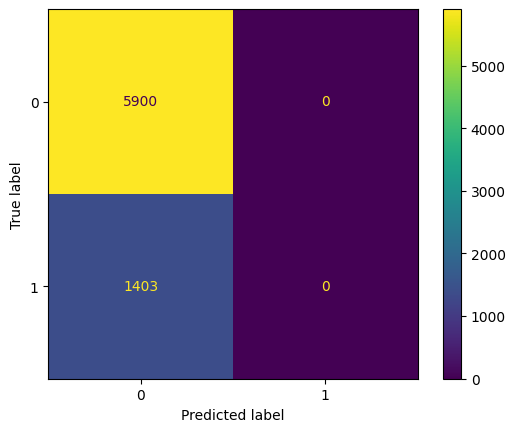

In [ ]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
# Converter os rótulos de teste e predições (se necessário)
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular as métricas usando os rótulos numéricos (0 e 1)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)

# Printar as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Modelagem de dados - Tunning**

In [ ]:
# Converter variáveis categóricas com múltiplas categorias para dummies
df_limpo = pd.get_dummies(df_limpo, drop_first=True)

# Definir as variáveis independentes X e a variável dependente y
X = df_limpo.drop(columns=['Churned'])  # Excluir a coluna alvo (target)
y = df_limpo['Churned']  # Definir a variável dependente

In [ ]:
# Escalonar as variáveis independentes
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir o modelo de Regressão Logística
model = LogisticRegression()

In [ ]:
# Configurar o GridSearch para tuning de hiperparâmetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

In [ ]:
# Ajustar (fit) o modelo com GridSearch nos dados de treino
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Obter os melhores hiperparâmetros encontrados pelo GridSearch
best_params = grid_search.best_estimator_.get_params()

In [ ]:
# Printar os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados pelo GridSearch:")
print(best_params)

Melhores hiperparâmetros encontrados pelo GridSearch:
{'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Fazer previsões com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

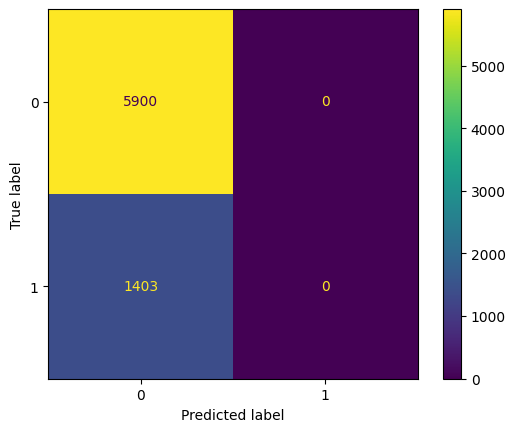

In [ ]:
# Exibir a matriz de confusão usando ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Modelagem de dados - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Definir o modelo de Random Forest
model = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

Neste momento, foi decidido utlizar o random_search porque o grid_search estava em looping infinito, assim, não finalizando o cálculo da célula.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Configurar RandomizedSearchCV com um número máximo de combinações testadas
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=42, verbose=1)

# Ajustar o modelo com os dados de treino
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=1)

In [ ]:
# Obter os melhores parâmetros
best_params = random_search.best_estimator_.get_params()
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Fazer previsões com o melhor modelo
y_pred = random_search.predict(X_test)

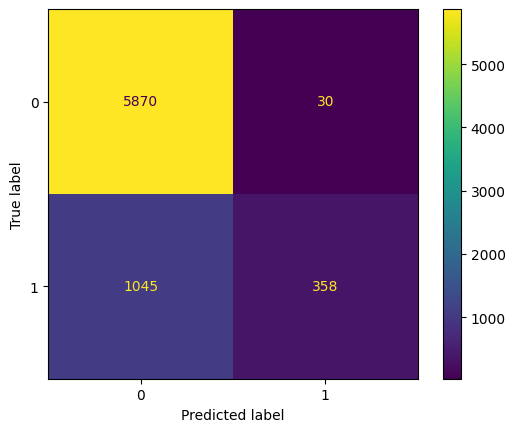

In [ ]:
# Exibir matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
Precision: 0.92
Recall: 0.26
F1 Score: 0.40


## **Resultado:**

**Regressão logística** e **Tunning** apresentaram as mesma métricas tendo a matriz de confusão igual. Este gráfico indica que os modelos estão prevendo apenas os casos verdadeiros. Entretanto, ao pensar somente nos casos que o modelo prevê churn, estamos ignorando os clientes que o modelo previu que permaneceriam, mas que na verdade cancelaram (falso negativo). Esse resultado pode provocar uma superestimativa da performance.

Já em **Radom Forest** o modelo conseguiu prever todos os quadrantes (verdadeiro, falso, falso positivo e falso negativo). De forma geral, acertou a maioria dos casos, porém falhou em identificar muitos clientes que realmente churnaram (alto número de Falsos Negativos).

## **Respondendo ao objetivo:**

Como a matriz de confusão, na análise de Random Forest, apresentou dados em todos os quadrantes respondemos ao objetivo utilizando esses dados:

1. Clientes que não vão cancelar (Verdadeiros Negativos - 5870):

O modelo fez 5870 previsões corretas para clientes que não vão cancelar a assinatura. Ele acertou a maioria dos clientes que continuarão com a assinatura, o que é um ponto positivo.

2. Clientes que vão cancelar (Verdadeiros Positivos - 358):

O modelo previu corretamente que 358 clientes vão cancelar suas assinaturas. Esses são os clientes que o modelo conseguiu identificar corretamente como churn.

3. Clientes que vão cancelar, mas o modelo não previu (Falsos Negativos - 1045):

Um problema sério está nos 1045 clientes que realmente cancelaram a assinatura, mas o modelo não conseguiu prever isso. Esses falsos negativos representam uma grande quantidade de clientes que o modelo não conseguiu identificar corretamente.

Implicação: O modelo não está sendo eficaz em prever quem vai cancelar a assinatura, o que pode ser uma falha significativa, especialmente se a retenção de clientes for uma prioridade.

4. Clientes que não vão cancelar, mas o modelo previu que sim (Falsos Positivos - 30):

O modelo previu incorretamente que 30 clientes cancelariam suas assinaturas, mas esses clientes na verdade não cancelaram. Este número é pequeno em comparação aos erros com churn real.